# Лабораторная работа №6. Обучение без учителя: кластеризация

*Кластеризация (неконтролируемая)* аналогична классификации (контролируемая), но основа другая. При кластеризации вы не знаете, что ищете, и пытаетесь идентифицировать некоторые сегменты или кластеры в своих данных. Когда вы используете алгоритмы кластеризации в своем наборе данных, могут внезапно возникнуть неожиданные вещи, такие как структуры, кластеры и группировки, о которых вы иначе никогда бы не подумали.

Ниже мы обсудим два наиболее важных метода кластеризации:

* K-средняя кластеризация
* Иерархическая кластеризация

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Tack6-2.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df= pd.get_dummies(df, drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


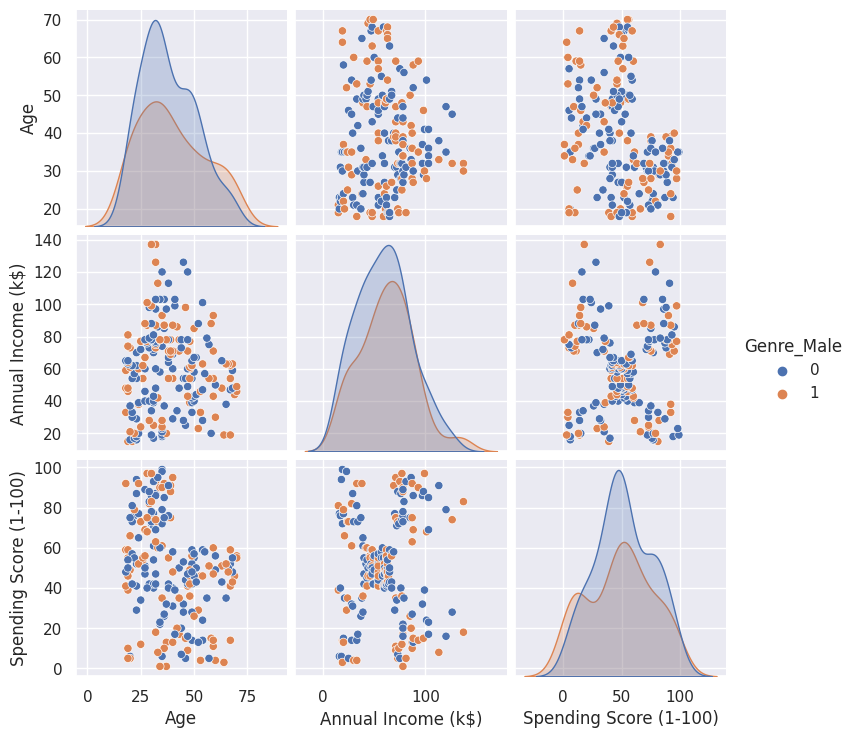

In [6]:
# посмотрим, есть ли в данных очевидная закономерность
sns.pairplot(df, hue='Genre_Male')
plt.show()

In [7]:
df.drop('Genre_Male', axis=1, inplace=True)

In [8]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# 1) K-Mean Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans_fit = kmeans.fit(df_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
kmeans_fit.cluster_centers_

array([[-0.93381128, -0.67979753,  0.1338202 ],
       [ 0.8916814 ,  0.04741398, -0.62080368],
       [-0.43033758,  1.02223317,  1.15593564]])

In [15]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2], dtype=int32)

In [16]:
kmeans_fit.predict(df_sc)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2], dtype=int32)

### Общая WCSS : общая сумма квадратов внутри кластеров. Чем меньше число, тем лучше.

In [17]:
kmeans_fit.inertia_ # это общая WCSS.

295.2122461555488

### Коэффициенты силуэта (Silhouette Coefficients):

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Коэффициент силуэта является мерой сплоченности и разделения кластеров. Он количественно определяет, насколько хорошо точка данных вписывается в назначенный ей кластер, на основе двух факторов:

* Насколько близко точка данных находится к другим точкам в кластере
* Насколько далеко точка данных находится от точек в других кластерах
Значения коэффициента силуэта варьируются от -1 до 1. Большие числа указывают на то, что образцы находятся ближе к своим кластерам, чем к другим кластерам.

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [19]:
silhouette_score(df_sc, kmeans.labels_)

0.357793388710272

In [20]:
# коэффициенты силуэта для каждого образца.
silhouette_samples(df_sc,kmeans.labels_)

array([ 0.44152549,  0.39493361,  0.25063852,  0.42229681,  0.34919282,
        0.42863944,  0.05516871,  0.28953765,  0.31658168,  0.42236995,
        0.33701964,  0.18038331,  0.30699108,  0.42174916,  0.04372246,
        0.40923766,  0.24079225,  0.47124967,  0.25161584,  0.16315376,
        0.23856831,  0.44032758,  0.18479966,  0.39891829,  0.32200142,
        0.32856276,  0.12019965,  0.37624927,  0.02580087,  0.30689376,
        0.35620531,  0.42583264,  0.32318498,  0.23260279,  0.28722517,
        0.34173152,  0.13415054,  0.3616115 ,  0.08595439,  0.36673183,
        0.44349021,  0.16005936,  0.29055136,  0.41311881,  0.32821049,
        0.4345631 ,  0.24108873,  0.48701651,  0.42020197,  0.37527873,
        0.25760383,  0.36733864,  0.42717195,  0.36347123,  0.33791043,
        0.2801194 ,  0.33738402,  0.44946283,  0.45643543,  0.40871757,
        0.41071759,  0.44560802,  0.44869374,  0.33912821,  0.45996406,
        0.40262958,  0.10727786,  0.46328723,  0.40717991,  0.35

## Настройка гиперпараметра K

1. Метод локтя (elbow method): построение графика WCSS в зависимости от K
2. Оценка силуэта (Silhouette scores)

In [21]:
WCSS=[] # for elbow method
silhouette_coefficients = [] # for Silhouette method
K= 15
for i in range(2,K+1):  # Notice you start at 2 clusters for silhouette coefficient
    kmeans= KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_sc)
    WCSS.append(kmeans.inertia_)
    scores = silhouette_score(df_sc, kmeans.labels_)
    silhouette_coefficients.append(scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [22]:
optimal_k = pd.DataFrame({'K':range(2,K+1), 'WCSS':WCSS, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,WCSS,silhouette_score
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,133.888870,0.426855
5,7,117.011555,0.417232
6,8,104.154299,0.407638
7,9,92.926043,0.419861
8,10,82.542192,0.399223
9,11,72.684524,0.406662


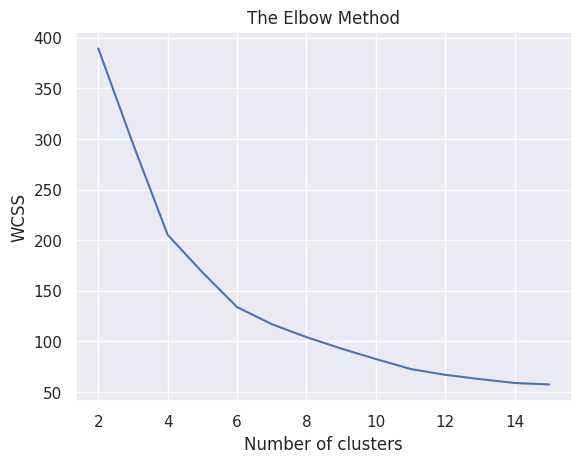

In [23]:
sns.lineplot(x='K', y='WCSS', data=  optimal_k)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

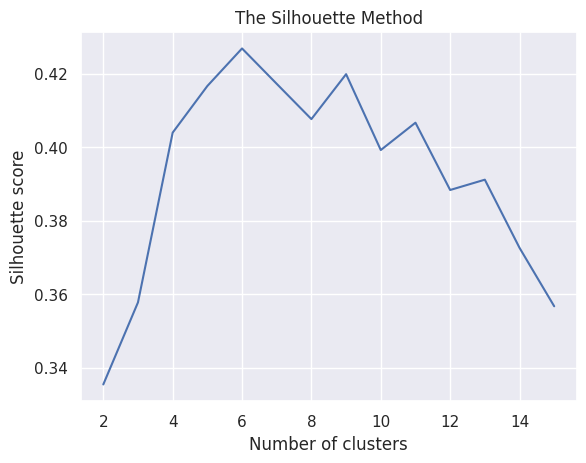

In [24]:
sns.lineplot(x='K', y='silhouette_score', data=  optimal_k)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

Судя по методу локтя и шкале Silhouette, оптимальное количество кластеров равно k=6.

---
# Cluster visualization (2D)
Давайте визуализируем кластеры. Для этого нам нужно придерживаться только двух измерений. Удалим столбец "возраст" из набора данных.

In [25]:
df_viz = df.drop('Age', axis=1, inplace=False)

In [26]:
df_viz.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
kmeans = KMeans(n_clusters=6, random_state=300)
clusters = kmeans.fit_predict(df_viz)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

In [28]:
kmeans.cluster_centers_

array([[ 54.61538462,  50.02564103],
       [ 78.89285714,  17.42857143],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348],
       [ 25.72727273,  79.36363636],
       [109.7       ,  22.        ]])

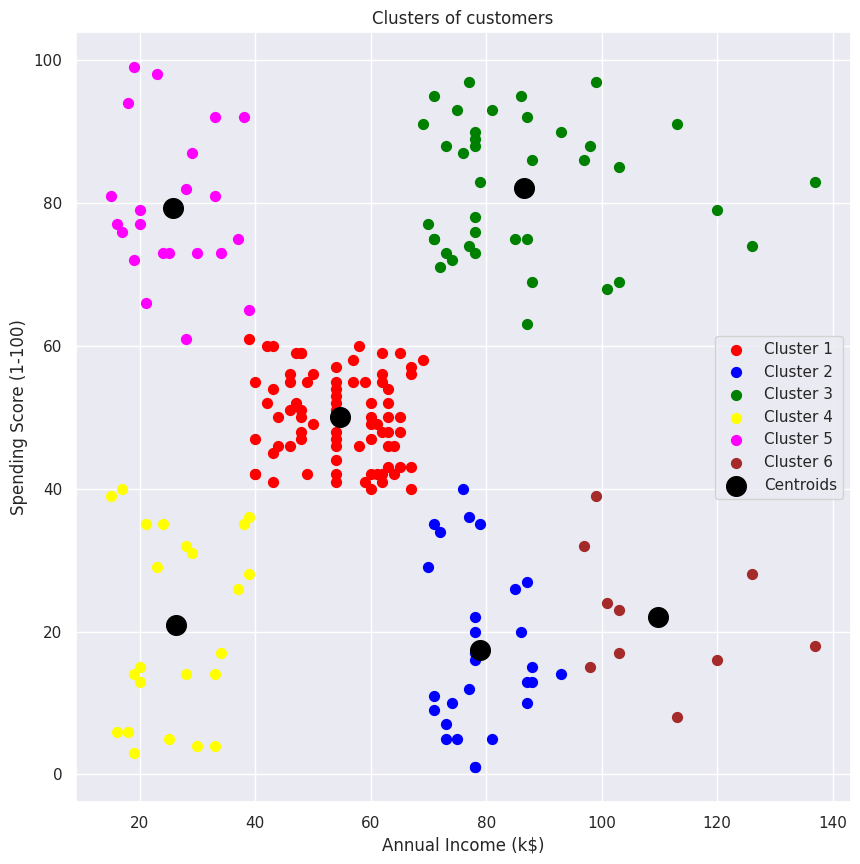

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(df_viz[clusters == 0].iloc[:,0], df_viz[clusters == 0].iloc[:,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_viz[clusters == 1].iloc[:,0], df_viz[clusters == 1].iloc[:,1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_viz[clusters == 2].iloc[:,0], df_viz[clusters == 2].iloc[:,1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(df_viz[clusters == 3].iloc[:,0], df_viz[clusters == 3].iloc[:,1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(df_viz[clusters == 4].iloc[:,0], df_viz[clusters == 4].iloc[:,1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(df_viz[clusters == 5].iloc[:,0], df_viz[clusters == 5].iloc[:,1], s = 50, c = 'brown', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 2) Иерархическая кластеризация (Hierarchical Clustering)

In [30]:
import scipy.cluster.hierarchy as sch

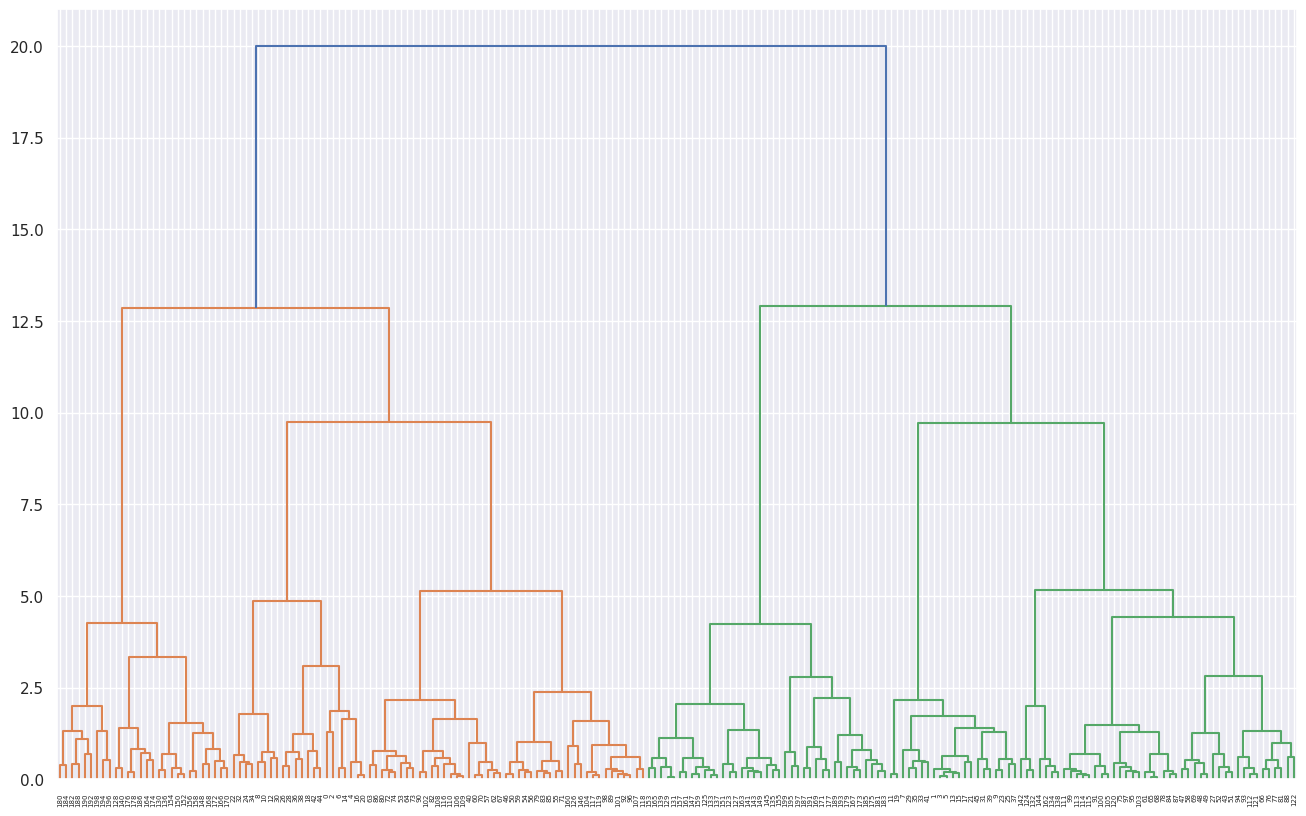

In [31]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df_sc,method='ward'))

Судя по приведенной выше дендрограмме, оптимальное количество кластеров также равно 6.

In [33]:
# Подгонка иерархической кластеризации к набору данных
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [34]:
hc_clusters

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

### Дополнительные ссылки:
1. Clustering methods in Sklearn : https://scikit-learn.org/stable/modules/clustering.html
2. Sklearn documentation for K-Mean Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. Sklearn documentation for Hierarchical Clustering: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
4. Plot Hierarchical Clustering Dendrogram : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
5. Agglomerative Clustering with SKlearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
